## Welcome to My Capstone Project for the Data Science Immersive course from MISK Academy

## Name: Fahad Reda
## Problem Statement: Flight Price  Prediction ( Regression Problem)

### One of the main thing to consider while traveling is calculating the cost of the trip, where the price of the flights ticket plays an important role, so this project is going to help the traveler to Predict the flight ticket,as buying tickets is a very hectic process, the output (Y) will be the Price of the Flight


#### Let's have a Look on our dataset

#### Source of the dataset: https://www.machinehack.com/

#### Let's load the libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [117]:
#we have two files one is the train data and the other one is test data
df_train=pd.read_excel("Data_Train.xlsx")
df_train.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [118]:
df_train.shape
# we can see that we have 10683 rows and 11 Features

(10683, 11)

In [119]:
#here we can see the first 8 datapoints from our dataset
df_train.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270


In [120]:
#here we can see the last 8 datapoints from our dataset
df_train.tail(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [121]:
df_train.info()
#here we can see we have one missing value in Route Feature and one mssing value in Total_Stops Feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [122]:
#Let's check again for the missing values
print(df_train.isnull().sum()) 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [123]:
df_train=df_train.dropna()

In [124]:
#let's check the Features (Columns)
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [125]:
#now let's extract the day,month,year,weekday from the Date of Journey Feature
df_train['Journey_Day'] = pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.day
df_train['Journey_Month'] = pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.month
df_train['weekday']= pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.weekday


In [126]:
#now we will remove the (Date Of Journey Feature),Because we just made 3 new features out of it
df_train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [127]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

In [128]:
#we need to convert the duration into minutes
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
df_train['Duration']=df_train['Duration'].apply(duration)

In [129]:
df_train['Duration'].nunique()

367

In [130]:
#now we will extract the timing from departure time and arrival time to check whether it is morning or evening or night
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df_train['Dep_Time']=df_train['Dep_Time'].apply(deparrtime)
df_train['Arrival_Time']=df_train['Arrival_Time'].apply(deparrtime)

In [131]:
#now we will convert total stops
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
df_train['Total_Stops']= df_train['Total_Stops'].astype(str).str.lstrip('<').str.rstrip('+')


In [132]:
pd.options.mode.chained_assignment = None 
for i in range(df_train.shape[0]):
    if(df_train.iloc[i]['Additional_Info']=='No info'):
        df_train.iloc[i]['Additional_Info']='No Info' 

In [133]:
df_train.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1140,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1 stop,No info,13302,1,3,4


In [134]:
df_train.info()
#No more missing values ,horrray :)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_Day      10682 non-null  int64 
 11  Journey_Month    10682 non-null  int64 
 12  weekday          10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [135]:
df_train["Duration"] = df_train["Duration"].astype(int)
df_train["Journey_Day"] = df_train["Journey_Day"].astype(object)
df_train["Journey_Month"] = df_train["Journey_Month"].astype(object)
df_train["weekday"] = df_train["weekday"].astype(object)
#Here we are changing the type of the features

In [136]:
df1 =df_train.copy()
#here we made a copy of the dataframe

In [137]:
#Here we will be assigning the months names
df1["Journey_Month"]=df1["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) 

In [138]:
df1["Journey_Month"]=df1["Journey_Month"].astype(object)

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  int32 
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_Day      10682 non-null  object
 11  Journey_Month    10682 non-null  object
 12  weekday          10682 non-null  object
dtypes: int32(1), int64(1), object(11)
memory usage: 1.1+ MB


#### Now After Pre-Processing the data and prepraing it , let's start the EDA

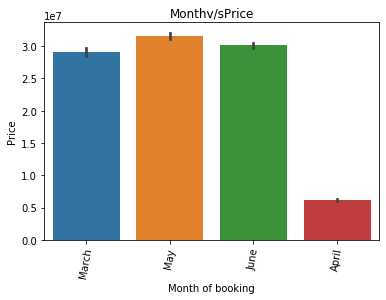

In [140]:
#Journey Month and the Price of the journey
v1=sns.barplot(x='Journey_Month', y='Price', data=df1,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)
v1.figure.savefig('N1-Month of booking-VS-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

We can notice that the total count of flight is higher in the month of May,which can also be concluded from the above chart which shows the sum of fare
 is higher in May,and this can be due that the summer vacation is in the month of may 
and we can also see that the flights are lowest on April, this can be because the school and universities have their final exams around this time

In [141]:
#count of flights per month
top_month=df1.Journey_Month.value_counts().head(10)
top_month

May      3465
June     3414
March    2724
April    1079
Name: Journey_Month, dtype: int64

In [142]:
monthly_avg=df1.groupby(['Journey_Month']).agg({'Price':np.mean}).reset_index()

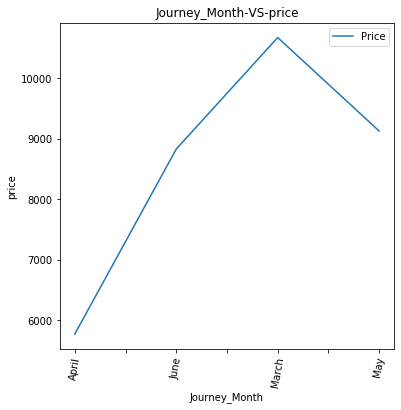

In [143]:
#Journey month v/s Averagefare
v2=monthly_avg.plot(x='Journey_Month',y='Price',figsize=(6,6))
#v2.fig.suptitle("Journey_Month VS price",fontsize=24, fontdict={"weight": "bold"})
#v2.savefig('N2-Journey_Month-VS-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)
v2.set_title('Journey_Month-VS-price')
v2.set_ylabel('price')
v2.set_xlabel('Journey_Month')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)
#v6.fig.suptitle("Arrival Time-VS-price",fontsize=24, fontdict={"weight": "bold"})
v2.figure.savefig('N2Journey_Month-VS-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

we can notice that the average ticket price is highest in the month of March, this can be because people mostly book 
their flights 2 to 3 months prior to their actual date of trip which leads to higher demand and hene higher fare prices

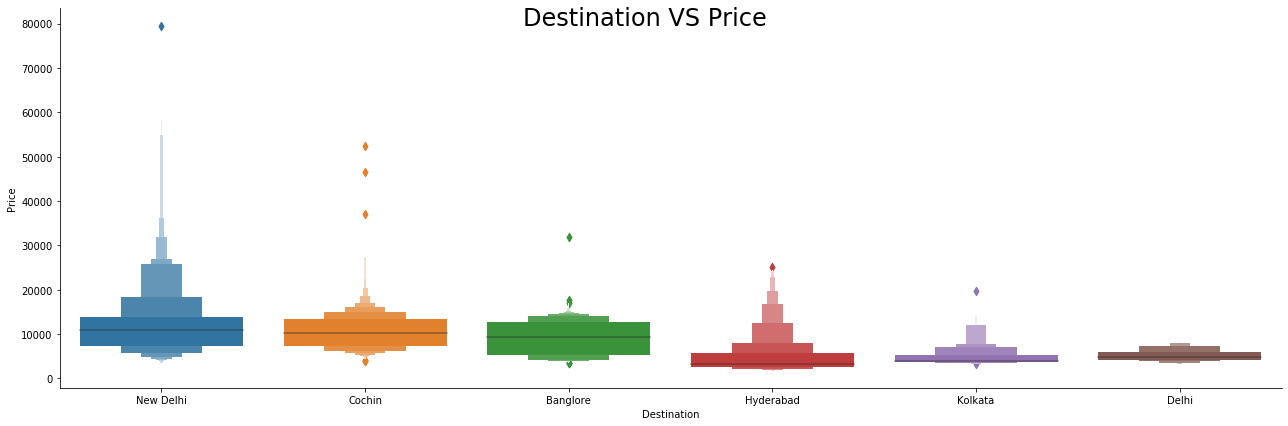

In [144]:
# Destination vs AveragePrice
v3=sns.catplot(y='Price',x='Destination',data= df1.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
v3.fig.suptitle("Destination VS Price",
                  fontsize=24, fontdict={"weight": "bold"})
v3.savefig('N3-Destination-VS-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)


we can notice that the price range in new delhi is higher than the other cities, and this can be due the jet fuel prices in
delhi has increased in 2018 by 26.4%

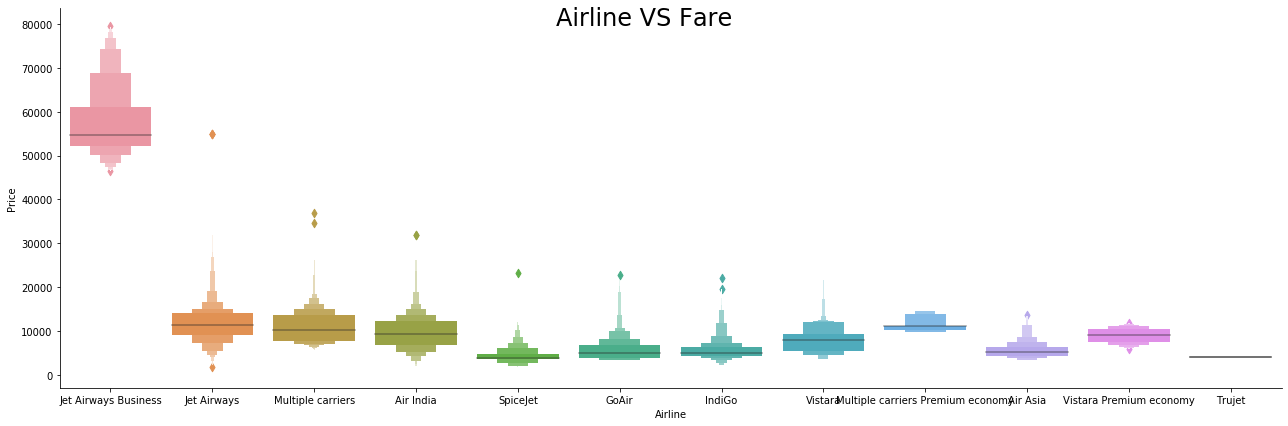

In [145]:
# Airline vs AveragePrice
v4=sns.catplot(y='Price',x='Airline',data= df_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
#v4.set_title('Airline VS Fare')
v4.fig.suptitle("Airline VS Fare",
                  fontsize=24, fontdict={"weight": "bold"})
v4.savefig('N4-AirLine-VS-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)


we can notice that jet airways (both the business and the standard one) are highly priced because they are full service
airlines are always expensive because of the amenities  they provide

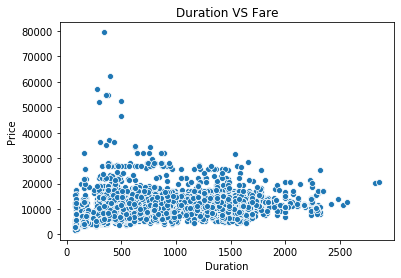

In [146]:
#duration and AveragePrice
v5=sns.scatterplot(data=df_train, x='Duration', y='Price')
v5.set_title('Duration VS Fare')
v5.figure.savefig('N5-Duration-VS-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)


Duration ( or distance) can play a significant role in affecting the ticket price but we don't see any pattern here, there must be other factors 
affecting air price like type of airline and date of journey ( if it was in a holiday's or in exams time)

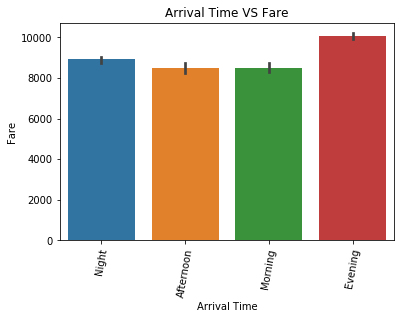

In [147]:
#Arrival Time and the price of the ticket
v6=sns.barplot(x='Arrival_Time', y='Price', data=df_train)
v6.set_title('Arrival Time VS Fare')
v6.set_ylabel('Fare')
v6.set_xlabel('Arrival Time')
v6.set_xticklabels(v6.get_xticklabels(), rotation=80)
#v6.fig.suptitle("Arrival Time-VS-price",fontsize=24, fontdict={"weight": "bold"})
v6.figure.savefig('N6-Arrival Time-VS-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

Here we can see that the flights that arrives in the evening their prices are higher than the other timings

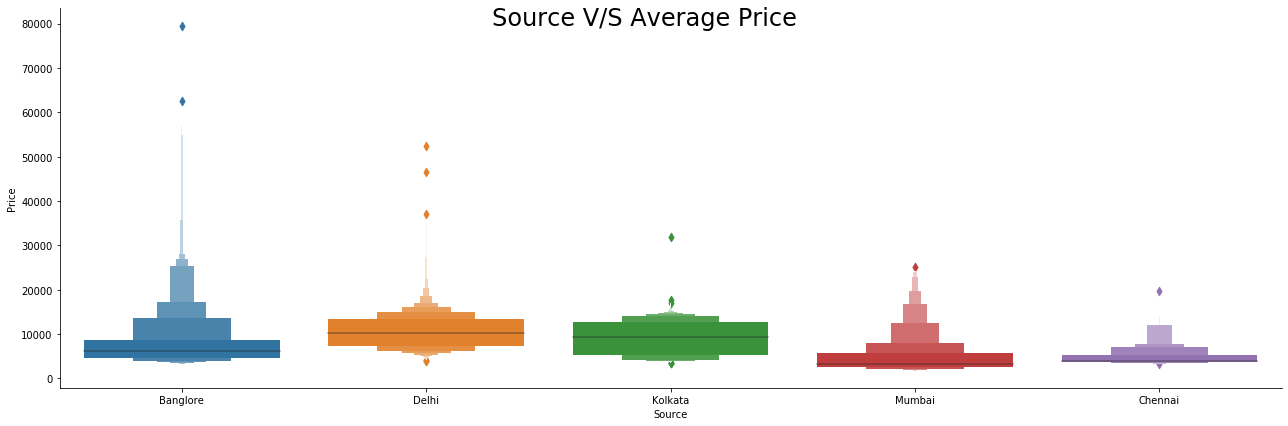

In [148]:
# Source vs AveragePrice
v7=sns.catplot(y='Price',x='Source',data= df_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
 
v7.fig.suptitle("Source V/S Average Price",
                  fontsize=24, fontdict={"weight": "bold"})
v7.savefig('N7-Source-VS-Avg-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)


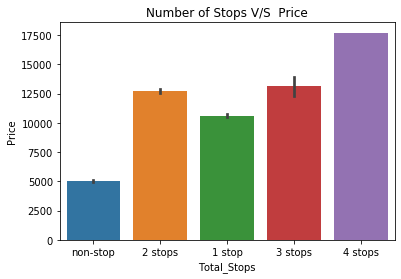

In [149]:
#total stops v/s average price
v8=sns.barplot(x='Total_Stops', y='Price', data=df_train)
v8.set_title('NO. OF STOPS V/S PRICE')
v8.set_ylabel('Price')
v8.set_xlabel('Total_Stops')
#v8.set_xticklabels(v4.get_xticklabels(), rotation=80)
#v8.fig.suptitle("Number of Stops V/S  Price",  fontsize=24, fontdict={"weight": "bold"})
#v8.savefig('N8-Number-of-stops-vs-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

v8.set_title('Number of Stops V/S  Price')
v8.figure.savefig('N8-Number-of-stops-vs-price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

we can see that the direct flights ( the one without any stops)are way cheaper than the transit one (more than one stop)

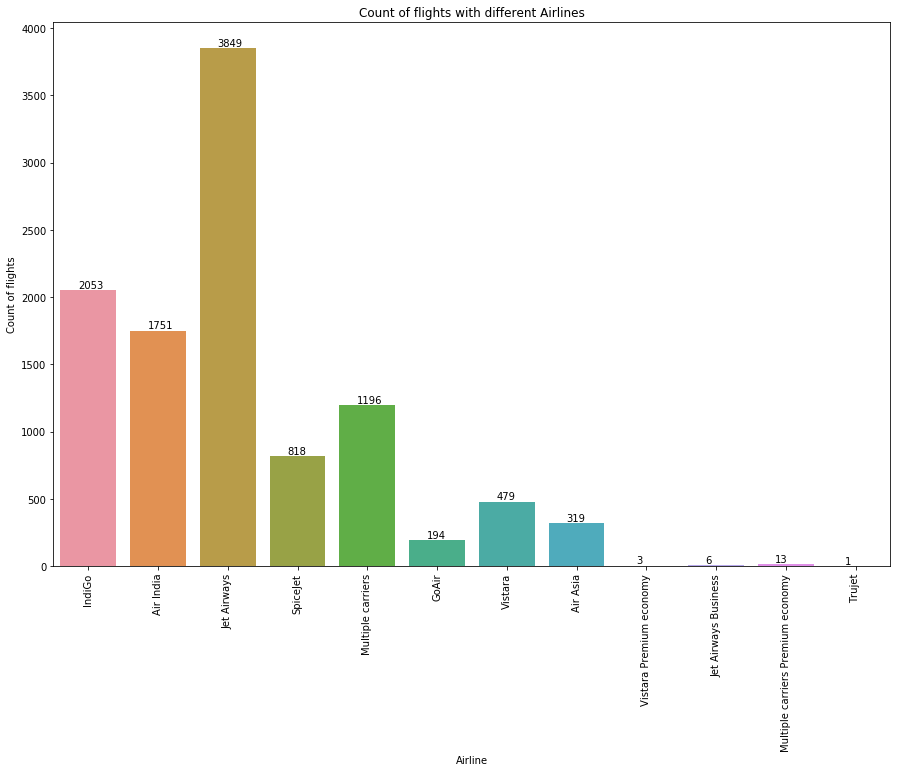

In [150]:
#Count of flights v/s Airline
v9=plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

v9.savefig('N9-Count of flights-VS-Airline.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

From the chart above we can see that most of the flights were from Jet Airways

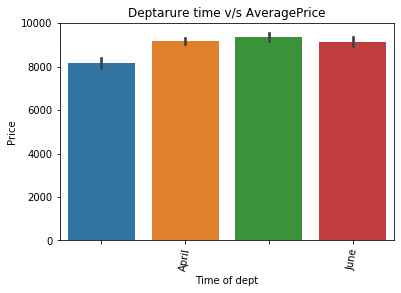

In [151]:
#Deptarure time v/s AveragePrice
v10=sns.barplot(x='Dep_Time', y='Price', data=df_train)
v10.set_ylabel('Price')
v10.set_xlabel('Time of dept')
v10.set_xticklabels(v2.get_xticklabels(), rotation=80)
v10.set_title('Deptarure time v/s AveragePrice')
v10.figure.savefig('N10-Deptarure time VSAveragePrice.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

We can see that flights in Morning and Evening and afternoon are higher than the one at night

In [152]:
#  departure time v/s count of flights
dep_time=df_train.Dep_Time.value_counts().head(10)
dep_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

we can see that most flights occur at Morning!

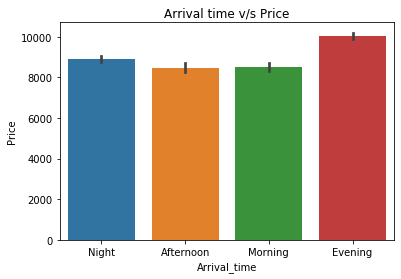

In [153]:
#Arrival Time V/S average price
v11=sns.barplot(x='Arrival_Time', y='Price', data=df_train)
v11.set_title('Arrival Time V/S Price')
v11.set_ylabel('Price')
v11.set_xlabel('Arrival_time')
v11.set_title('Arrival time v/s Price')
v11.figure.savefig('N11-Arrival Time VS Price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

we can see that flights that arrives in the evening are higher than the other timings

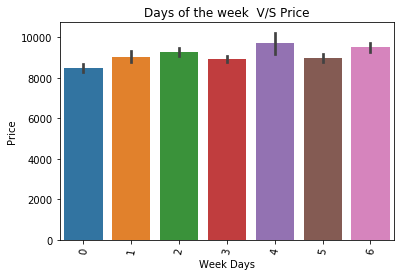

In [154]:
#Days of week V/S average price
v12=sns.barplot(x='weekday', y='Price', data=df_train)
v12.set_title('Days of the week  V/S Price')
v12.set_ylabel('Price')
v12.set_xlabel('Week Days')
v12.set_xticklabels(v12.get_xticklabels(), rotation=80)
v12.figure.savefig('N12-WeekDays VS Price.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)

0= Monday , 1=Tuesday , 2= Wednesday , 3= Thursday , 4= Friday ,5= Saturday , 6=Sunday
#### We can see that prices are higher on Friday

In [155]:
print(df_train.dtypes)

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration            int32
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day        object
Journey_Month      object
weekday            object
dtype: object


#### Let's remove Some Outlier

In [156]:
ncol=["Duration"]          
for i in ncol:
    q75, q25 = np.percentile(df_train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df_train = df_train.drop(df_train[df_train.loc[:,i] <= min].index)
    df_train = df_train.drop(df_train[df_train.loc[:,i] >= max].index)

In [157]:
df_train.shape

(10607, 13)

### Let's check for some Correlation

I will be conducting a Pearson Correlation, a brief introduction about correlation , Correlation coefficients are used to measure how strong a relationship is between two variables

In order to check the linear association between the target variable (Price) and the independent variables,this condition must to be met)
Null Hypothesis(H0): the two variables are not correlated
Alternative Hypothesis(H1): the two variables are correlated
if p-value <0.05, then we reject the H0 and Accept the H1, which means there is correlation between them

C:\Users\fahad\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


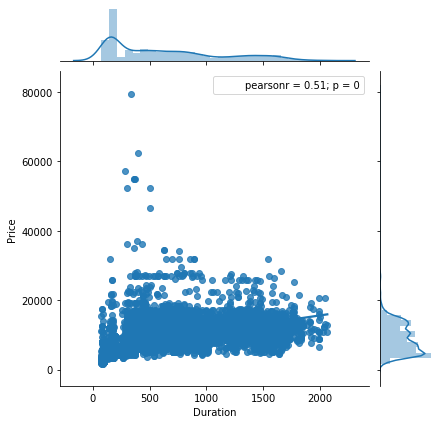

In [158]:
import scipy.stats as stats
v13=_ = sns.jointplot(x='Duration',y='Price',data=df_train,kind = 'reg')
v13=_.annotate(stats.pearsonr)
v13.savefig('N13-Pearson Correlation.png', dpi=500,bbox_inches='tight' , pad_inches=0.5,bottom=0.15)


we can see that our p-value is greater than the 0.05, which means we accept H1 and can say that the target variable and independent variable are correlated

Now we will Label Encode some variables, we do that so that the machine can understand it, for eg, Male and Female will become 0,1

In [160]:
# I am Importing a label encoder 
colnames = list(df_train.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if df_train[col].dtype==object:
        df_train[col]= label_encoder.fit_transform(df_train[col]) 

In [161]:
cat_var=["Airline","Source","Destination","Dep_Time","Arrival_Time","Total_Stops","Additional_Info","Journey_Day","Journey_Month","weekday"] 
catdf=df_train[cat_var]

In [163]:
catdf.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,4,8,8,0,6
1,1,3,0,2,0,1,8,0,2,2
2,4,2,1,2,3,1,8,3,3,6
3,3,3,0,1,3,0,8,4,2,6
4,3,0,5,1,3,0,8,0,0,4


In [166]:
#let's have a Quick look of our dataset after applying label encoder
df_train.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,18,3,3,170,4,8,3897,8,0,6
1,1,3,0,83,2,0,445,1,8,7662,0,2,2
2,4,2,1,117,2,3,1140,1,8,13882,3,3,6
3,3,3,0,90,1,3,325,0,8,6218,4,2,6
4,3,0,5,29,1,3,285,0,8,13302,0,0,4


### Now we will do another correlation test but this time for Categorical variables

I will be using Chi-Square Statistic, and we use Chi-Square to test if there is a relationship between categorical variables

The Null Hypothesis(H0): The two variables are independent
The Alternative Hypothesis(H1): The two variables are dependent
if the p-value is lower than 0.01 (p-value<0.01), we will take the confidence interval as 99%, and alpha =0.01

In [167]:
from sklearn.feature_selection import chi2
n= 10
for i in range(0,9):
    X=catdf.iloc[:,i+1:n]
    y=catdf.iloc[:,i]
    chi_scores = chi2(X,y)
    p_values = pd.Series(chi_scores[1],index = X.columns)
    print("for",i)
    print(p_values)
    for j in range (0, len(p_values)):
        if (p_values[j]<0.01):
            print(p_values[j])

for 0
Source              8.820670e-27
Destination        1.533042e-100
Dep_Time            1.230267e-18
Arrival_Time        2.326187e-43
Total_Stops         0.000000e+00
Additional_Info    3.278318e-135
Journey_Day         8.385096e-20
Journey_Month       4.636612e-19
weekday             2.734029e-07
dtype: float64
8.820670331426913e-27
1.5330422437453207e-100
1.2302669994871291e-18
2.3261867607360984e-43
0.0
3.2783178372619666e-135
8.385095871696189e-20
4.636611779535766e-19
2.7340294892030177e-07
for 1
Destination         0.000000e+00
Dep_Time            1.392114e-12
Arrival_Time        7.512106e-09
Total_Stops         0.000000e+00
Additional_Info     5.356819e-03
Journey_Day         1.688902e-46
Journey_Month      1.120584e-119
weekday             4.997240e-15
dtype: float64
0.0
1.3921139842786042e-12
7.512106274131072e-09
0.0
0.005356818500426929
1.6889023281432186e-46
1.1205840945706247e-119
4.997240279732512e-15
for 2
Dep_Time           5.048386e-12
Arrival_Time       2.149719e-

In [169]:
#After checking the p-values we will be dropping the following values:
df_train=df_train.drop(["Airline","Source","Destination","Total_Stops","Journey_Month","Journey_Day","Arrival_Time"],axis=1)

In [171]:
#We Already Have total stops so we don't need this feature
df_train=df_train.drop(['Route'], axis=1)

In [172]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10607 entries, 0 to 10682
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Dep_Time         10607 non-null  int32
 1   Duration         10607 non-null  int32
 2   Additional_Info  10607 non-null  int32
 3   Price            10607 non-null  int64
 4   weekday          10607 non-null  int32
dtypes: int32(4), int64(1)
memory usage: 331.5 KB


#### Let's Start Building our Model

In [173]:
df2_train = pd.read_excel('Data_Train.xlsx')
df_test= pd.read_excel('Test_set.xlsx')

In [174]:
df2_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [175]:
df2_train.shape

(10683, 11)

In [177]:
df_test.head()
#we can see that it is the same as train test minus the price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [178]:
df_test.shape

(2671, 10)

In [179]:
print(df2_train.dtypes)
print(df_test.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


In [180]:
#let's check for some null values
print(df_test.isnull().sum())
print(df2_train.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [181]:
df2_train=df2_train.dropna()

In [182]:
df2_train.shape

(10682, 11)

### Let's Extract Some Features

We will be extracting day ,Month , Weekdays from the Feature Date of Journey

In [183]:
df2_train['Journey_Day'] = pd.to_datetime(df2_train.Date_of_Journey, format='%d/%m/%Y').dt.day
df2_train['Journey_Month'] = pd.to_datetime(df2_train.Date_of_Journey, format='%d/%m/%Y').dt.month
df2_train['weekday']= pd.to_datetime(df2_train.Date_of_Journey, format='%d/%m/%Y').dt.weekday

df_test['Journey_Day'] = pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.day
df_test['Journey_Month'] = pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.month
df_test['weekday']= pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.weekday

After Extracting the Month - Days - Weekdays from the Date of Journey we don't need this feature so we will remove it (drop it)

In [184]:
df2_train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
df_test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

Let's have a look at our columns (Features)

In [185]:
df2_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

Now we will be converting Duration into Minutes

In [187]:
def duration(df_test):
    df_test = df_test.strip()
    total=df_test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    df_test=str(hrs)
    return df_test
df2_train['Duration']=df2_train['Duration'].apply(duration)
df_test['Duration']=df_test['Duration'].apply(duration)

Now we will extract whether if the departure and arrival time of the flights occured at Morning , Evening , Night or Afternoon

In [188]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df2_train['Dep_Time']=df2_train['Dep_Time'].apply(deparrtime)
df_test['Dep_Time']=df_test['Dep_Time'].apply(deparrtime)
df2_train['Arrival_Time']=df2_train['Arrival_Time'].apply(deparrtime)
df_test['Arrival_Time']=df_test['Arrival_Time'].apply(deparrtime)

In [189]:
#now we will convert total stops into 0-1-2... etc
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
df2_train['Total_Stops']=df2_train['Total_Stops'].apply(stops)
df_test['Total_Stops']=df_test['Total_Stops'].apply(stops)

In [190]:
pd.options.mode.chained_assignment = None 
for i in range(df_test.shape[0]):
    if(df_test.iloc[i]['Additional_Info']=='No info'):
        df_test.iloc[i]['Additional_Info']='No Info' 

In [191]:
pd.options.mode.chained_assignment = None 
for i in range(df2_train.shape[0]):
    if(df2_train.iloc[i]['Additional_Info']=='No info'):
        df2_train.iloc[i]['Additional_Info']='No Info' 

In [192]:
df2_train=df2_train.drop(['Route'], axis=1) 
df_test=df_test.drop(['Route'], axis=1)

### Now Let's check our data

In [193]:
df2_train.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [194]:
df_test.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,Evening,Night,655,1,No info,6,6,3
1,IndiGo,Kolkata,Banglore,Morning,Morning,240,1,No info,12,5,6
2,Jet Airways,Delhi,Cochin,Evening,Evening,1425,1,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,Morning,Night,780,1,No info,21,5,1
4,Air Asia,Banglore,Delhi,Night,Night,170,0,No info,24,6,0


In [195]:
print(df2_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  weekday          10682 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airl

Let's check relationship between Departure Time and Price

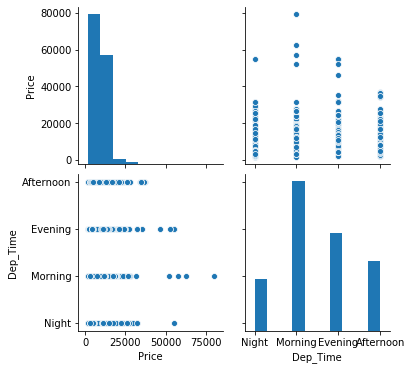

In [196]:
sns.pairplot(data=df2_train,vars=['Price','Dep_Time'])

In [197]:
#Checking the Outlier in the Price
Q1=df2_train['Price'].quantile(0.25)
Q3=df2_train['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

5277.0
12373.0
7096.0


In [198]:
#let's remove the outlier from Price
df2_train=df2_train[~((df2_train['Price']>Q3+1.5*IQR)|(df2_train['Price']<Q1-1.5*IQR))]

In [199]:
df2_train.shape

(10588, 12)

In [200]:
#Let's Convert some Features
df2_train["Duration"] = df2_train["Duration"].astype(int)
df_test["Duration"] = df_test["Duration"].astype(int)
df2_train["Journey_Day"] = df2_train["Journey_Day"].astype(object)
df_test["Journey_Day"] = df_test["Journey_Day"].astype(object)
df2_train["Journey_Month"] = df2_train["Journey_Month"].astype(object)
df_test["Journey_Month"] = df_test["Journey_Month"].astype(object)
df2_train["weekday"] = df2_train["weekday"].astype(object)
df_test["weekday"] = df_test["weekday"].astype(object)

C:\Users\fahad\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


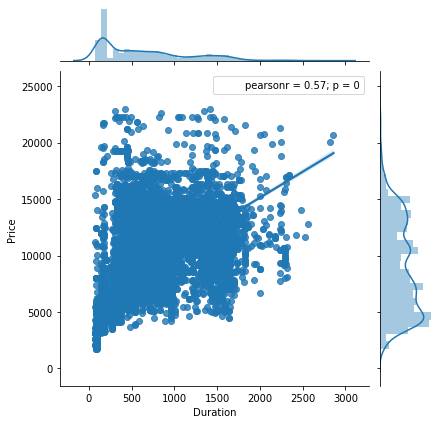

In [201]:
#Now we will do some Correlation analysis between Duration and Price
import scipy.stats as stats
_ = sns.jointplot(x='Duration',y='Price',data=df2_train,kind = 'reg')
_.annotate(stats.pearsonr)


In [202]:
#Encoding some Labels
# Importing label encoder 
colnames = list(df2_train.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if df2_train[col].dtype==object:
        df2_train[col]= label_encoder.fit_transform(df2_train[col]) 

In [204]:
df2_train.head(5)
#we can see that features are numbers after applying label encoder :) 

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,5,3897,8,0,6
1,1,3,0,2,0,445,2,5,7662,0,2,2
2,4,2,1,2,3,1140,2,5,13882,3,3,6
3,3,3,0,1,3,325,1,5,6218,4,2,6
4,3,0,5,1,3,285,1,5,13302,0,0,4


In [206]:
df2_train.info()
#we can see that the dataset is now transformed into numbers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10588 non-null  int32
 1   Source           10588 non-null  int32
 2   Destination      10588 non-null  int32
 3   Dep_Time         10588 non-null  int32
 4   Arrival_Time     10588 non-null  int32
 5   Duration         10588 non-null  int32
 6   Total_Stops      10588 non-null  int32
 7   Additional_Info  10588 non-null  int32
 8   Price            10588 non-null  int64
 9   Journey_Day      10588 non-null  int32
 10  Journey_Month    10588 non-null  int32
 11  weekday          10588 non-null  int32
dtypes: int32(11), int64(1)
memory usage: 620.4 KB


In [207]:
#now lets encode them into proper data types
df2_train["weekday"] = df2_train["weekday"].astype(object)
df2_train["Dep_Time"] = df2_train["Dep_Time"].astype(object)
df2_train["Airline"]=df2_train["Airline"].astype(object)
df2_train["Source"]=df2_train["Source"].astype(object)
df2_train["Destination"]=df2_train["Destination"].astype(object)
df2_train["Arrival_Time"]=df2_train["Arrival_Time"].astype(object)
df2_train["Total_Stops"]=df2_train["Total_Stops"].astype(object)
df2_train["Additional_Info"]=df2_train["Additional_Info"].astype(object)
df2_train["Journey_Day"]=df2_train["Journey_Day"].astype(object)
df2_train["Journey_Month"]=df2_train["Journey_Month"].astype(object)

In [208]:
df2_train.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,5,3897,8,0,6
1,1,3,0,2,0,445,2,5,7662,0,2,2
2,4,2,1,2,3,1140,2,5,13882,3,3,6
3,3,3,0,1,3,325,1,5,6218,4,2,6
4,3,0,5,1,3,285,1,5,13302,0,0,4


In [211]:
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10588 non-null  object
 1   Source           10588 non-null  object
 2   Destination      10588 non-null  object
 3   Dep_Time         10588 non-null  object
 4   Arrival_Time     10588 non-null  object
 5   Duration         10588 non-null  int32 
 6   Total_Stops      10588 non-null  object
 7   Additional_Info  10588 non-null  object
 8   Price            10588 non-null  int64 
 9   Journey_Day      10588 non-null  object
 10  Journey_Month    10588 non-null  object
 11  weekday          10588 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 1.0+ MB


In [212]:
#Let's do the same to the test data

colnames = list(df_test.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if df_test[col].dtype==object:
        df_test[col]= label_encoder.fit_transform(df_test[col]) 

In [213]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2671 non-null   int32
 1   Source           2671 non-null   int32
 2   Destination      2671 non-null   int32
 3   Dep_Time         2671 non-null   int32
 4   Arrival_Time     2671 non-null   int32
 5   Duration         2671 non-null   int32
 6   Total_Stops      2671 non-null   int32
 7   Additional_Info  2671 non-null   int32
 8   Journey_Day      2671 non-null   int32
 9   Journey_Month    2671 non-null   int32
 10  weekday          2671 non-null   int32
dtypes: int32(11)
memory usage: 114.9 KB


In [214]:
df_test["weekday"] = df_test["weekday"].astype(object)
df_test["Dep_Time"] = df_test["Dep_Time"].astype(object)
df_test["Airline"]=df_test["Airline"].astype(object)
df_test["Source"]=df_test["Source"].astype(object)
df_test["Destination"]=df_test["Destination"].astype(object)
df_test["Arrival_Time"]=df_test["Arrival_Time"].astype(object)
df_test["Total_Stops"]=df_test["Total_Stops"].astype(object)
df_test["Additional_Info"]=df_test["Additional_Info"].astype(object)
df_test["Journey_Day"]=df_test["Journey_Day"].astype(object)
df_test["Journey_Month"]=df_test["Journey_Month"].astype(object)

In [215]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Dep_Time         2671 non-null   object
 4   Arrival_Time     2671 non-null   object
 5   Duration         2671 non-null   int32 
 6   Total_Stops      2671 non-null   object
 7   Additional_Info  2671 non-null   object
 8   Journey_Day      2671 non-null   object
 9   Journey_Month    2671 non-null   object
 10  weekday          2671 non-null   object
dtypes: int32(1), object(10)
memory usage: 219.2+ KB


In [216]:
df_test.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,4,2,1,1,3,655,1,5,2,3,3
1,3,3,0,2,2,240,1,5,4,2,6
2,4,2,1,1,1,1425,1,3,7,2,1


In [217]:
from sklearn import preprocessing

In [218]:
df2_train["Duration"]= (df2_train["Duration"] - df2_train["Duration"].mean())/df2_train["Duration"].std()   #standardizing
df_test["Duration"]= (df_test["Duration"] - df_test["Duration"].mean())/df_test["Duration"].std()

In [219]:
X=df2_train.drop(["Price"],axis=1)
Y=df2_train["Price"]
x=np.array(X)
y=np.array(Y)

In [221]:
!pip install xgboost

In [222]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [223]:
gbm = GradientBoostingRegressor()
xgb = XGBRegressor()

In [228]:
best_gbm = GridSearchCV(gbm, param_grid={'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],'n_estimators':[100,200,500]}, cv=6, n_jobs=-1)
best_xgb = GridSearchCV(xgb, param_grid={'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],'n_estimators':[100,200,500]}, cv=6, n_jobs=-1)

In [229]:
best_gbm.fit(x,y)
best_xgb.fit(x,y)

GridSearchCV(cv=6,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [230]:
scores = cross_val_score(best_gbm.best_estimator_, x, y, cv=5)
print("GBM Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
scores = cross_val_score(best_xgb.best_estimator_, x, y, cv=5)
print("XGBoost Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

GBM Cross validation score: 87.59% (+/- 0.51%)
XGBoost Cross validation score: 87.48% (+/- 0.70%)


In [234]:
#Now Let's use K Nearest Neighbors
number_of_neighbors = range(1,20)
#params = {'n_neighbors':number_of_neighbors}
hyperparameters = {'n_neighbors':number_of_neighbors}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, hyperparameters, cv=10) 
model.fit(x,y)
scores = cross_val_score(model, x, y, cv=10)
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Cross validation score: 77.05% (+/- 3.10%)


In [235]:
#Trying Random Forest NOW
parameters = {'n_estimators':[800], "max_features" : ["auto", "log2", "sqrt"],"bootstrap": [True, False]}
clf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=-1)
clf.fit(x, y)
scores = cross_val_score(clf, x, y, cv=5)
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Cross validation score: 90.03% (+/- 1.12%)


In [237]:
x=np.array(df_test)

In [238]:
ypred=clf.predict(x)

In [239]:
test= pd.read_excel('Test_set.xlsx')
test["Price"]=ypred

In [240]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [241]:
test=test.drop(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],axis=1)

In [242]:
test.head()

,Price
0,14716.10000
1,4487.99750
2,12898.00000
3,12862.98800
4,3693.88625


### This is the end of this Project, Thanks for reading, Best Regards: Fahad Reda